In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

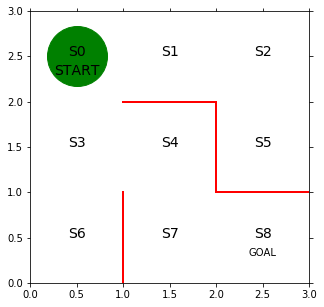

In [2]:
# マップ作成
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# 壁を書く
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を書く
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', size=14, ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 設定
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)
plt.savefig('fig1.png', bbox_inches='tight')

In [3]:
# 方策のパラメータを設定
theta_0 = np.array([
    [np.nan, 1, 1, np.nan], # s0
    [np.nan, 1, np.nan, 1], # s1
    [np.nan, np.nan, 1, 1], # s2
    [1, 1, 1, np.nan], # s3
    [np.nan, np.nan, 1, 1], # s4
    [1, np.nan, np.nan, np.nan], #s5
    [1, np.nan, np.nan, np.nan], # s6
    [1, 1, np.nan, np.nan] #s7
])

In [4]:
# 方策に変換する関数
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [5]:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [6]:
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
        
    return s_next

In [7]:
def goal_maze(pi):
    s = 0
    state_history = [0]
    while True:
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
        
    return state_history

In [8]:
state_history = goal_maze(pi_0)

In [9]:
print(state_history)
print('迷路を解くのにかかったステップ数は' + str(len(state_history) - 1) + 'です')

[0, 3, 4, 7, 4, 7, 4, 7, 4, 3, 4, 3, 6, 3, 4, 3, 6, 3, 0, 3, 4, 7, 4, 3, 4, 3, 4, 7, 4, 3, 0, 3, 4, 7, 4, 7, 4, 7, 4, 7, 4, 3, 6, 3, 4, 7, 4, 3, 4, 7, 8]
迷路を解くのにかかったステップ数は50です


In [10]:
from matplotlib import animation
from IPython.display import HTML
%matplotlib notebook

In [11]:
def init():
    line.set_data([], [])
    return (line,)

In [12]:
def animate(i):
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

In [15]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)
HTML(anim.to_jshtml())
anim.save('animation1.gif', writer='imagemagick')

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


In [22]:
def softmax_convert_into_pi_from_theta(theta):
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [23]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [24]:
def get_action_and_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == 'up':
        action = 0
        s_next = s - 3
    elif next_direction == 'right':
        action = 1
        s_next = s + 1
    elif next_direction == 'down':
        action = 2
        s_next = s + 3
    elif next_direction == 'left':
        action = 3
        s_next = s - 1
        
    return [action, s_next]

In [25]:
def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    while True:
        [action, next_s] = get_action_and_next_s(pi, s)
        # 最新の状態の行動を記録する
        s_a_history[-1][1] = action
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
        
    return s_a_history

In [26]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print('迷路を解くのにかかったステップ数は' + str(len(s_a_history) - 1) + 'です')

[[0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 2], [6, 0], [3, 2], [6, 0], [3, 0], [0, 2], [3, 0], [0, 2], [3, 1], [4, 3], [3, 0], [0, 2], [3, 1], [4, 2], [7, 0], [4, 2], [7, 1], [8, nan]]
迷路を解くのにかかったステップ数は22です


In [29]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    [m, n] = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
    return new_theta

In [30]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49659096 0.50340904 0.        ]
 [0.         0.49886364 0.         0.50113636]
 [0.         0.         0.5        0.5       ]
 [0.333838   0.333838   0.332324   0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [35]:
stop_epsilon = 10 ** -8

theta = theta_0
pi = pi_0

is_continue = True
count = 1

In [36]:
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print('迷路を解くのにかかったステップ数は' + str(len(s_a_history) - 1) + 'です')
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi

0.019999333359999205
迷路を解くのにかかったステップ数は10です
0.013129097826283076
迷路を解くのにかかったステップ数は46です
0.01033813199222372
迷路を解くのにかかったステップ数は66です
0.020255714511057565
迷路を解くのにかかったステップ数は18です
0.032735218760915896
迷路を解くのにかかったステップ数は6です
0.007927109431024926
迷路を解くのにかかったステップ数は68です
0.02116103512682499
迷路を解くのにかかったステップ数は14です
0.01679307101616878
迷路を解くのにかかったステップ数は16です
0.005848684916791302
迷路を解くのにかかったステップ数は112です
0.008336114032079178
迷路を解くのにかかったステップ数は144です
0.017773498597586646
迷路を解くのにかかったステップ数は22です
0.021302007643823007
迷路を解くのにかかったステップ数は14です
0.013379449948911937
迷路を解くのにかかったステップ数は74です
0.0031753439256658744
迷路を解くのにかかったステップ数は106です
0.009923028261917821
迷路を解くのにかかったステップ数は60です
0.008284752733482559
迷路を解くのにかかったステップ数は80です
0.010778129366233846
迷路を解くのにかかったステップ数は32です
0.03322163922461663
迷路を解くのにかかったステップ数は6です
0.008383580997645856
迷路を解くのにかかったステップ数は62です
0.02413962806575326
迷路を解くのにかかったステップ数は12です
0.01678766535507037
迷路を解くのにかかったステップ数は26です
0.0110480627373854
迷路を解くのにかかったステップ数は70です
0.00810167130092615
迷路を解くのにかかったステップ数は64です
0.0092231981291985

4.69542272718252e-06
迷路を解くのにかかったステップ数は4です
4.466435553290136e-06
迷路を解くのにかかったステップ数は4です
4.2486151408719685e-06
迷路を解くのにかかったステップ数は4です
4.0414169835989305e-06
迷路を解くのにかかったステップ数は4です
3.844323118401285e-06
迷路を解くのにかかったステップ数は4です
3.656840839439483e-06
迷路を解くのにかかったステップ数は4です
3.478501457568594e-06
迷路を解くのにかかったステップ数は4です
3.3088591388462634e-06
迷路を解くのにかかったステップ数は4です
3.147489783545436e-06
迷路を解くのにかかったステップ数は4です
2.9939899704853383e-06
迷路を解くのにかかったステップ数は4です
2.8479759490411217e-06
迷路を解くのにかかったステップ数は4です
2.709082678020058e-06
迷路を解くのにかかったステップ数は4です
2.576962917203802e-06
迷路を解くのにかかったステップ数は4です
2.4512863544332095e-06
迷路を解くのにかかったステップ数は4です
2.3317387868043378e-06
迷路を解くのにかかったステップ数は4です
2.218021329412217e-06
迷路を解くのにかかったステップ数は4です
2.109849673089361e-06
迷路を解くのにかかったステップ数は4です
2.0069533711118697e-06
迷路を解くのにかかったステップ数は4です
1.9090751636461865e-06
迷路を解くのにかかったステップ数は4です
1.8159703363173494e-06
迷路を解くのにかかったステップ数は4です
1.7274061072123071e-06
迷路を解くのにかかったステップ数は4です
1.643161046217553e-06
迷路を解くのにかかったステップ数は4です
1.5630245194153634e-06
迷路を解くのにかかったステップ数は4です


In [38]:
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.    1.    0.   ]
 [0.    0.402 0.    0.598]
 [0.    0.    0.498 0.502]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]]


In [41]:
def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

In [42]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())
# anim.save('animation1.gif', writer='imagemagick')